In [1]:
import sys
sys.path.append("..")

In [8]:
from pathlib import Path

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt


from data import read_data, create_training_test_dataset

In [9]:
path = Path("../../data/raw_data/datatraining.txt")
df = read_data(path)
X_train, X_test, y_train, y_test = create_training_test_dataset(df, test_size=0.2)

In [10]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [44]:
def plot_x_y_data(X, y, column):
    fig, ax = plt.subplots(2, 1, figsize=(12,8), sharex=True)
    fig.tight_layout(pad=3.0)    
    
    X[column].plot(ax=ax[0])
    ax[0].title.set_text(f" Features: {column}")
    y.plot(ax=ax[1], color='orange')
    ax[1].title.set_text(" Labels: Occupancy")

In [45]:
interact(plot_x_y_data, X=fixed(X_train), y=fixed(y_train), column=list(X_train.columns))

interactive(children=(Dropdown(description='column', options=('Temperature', 'Humidity', 'Light', 'CO2', 'Humi…

<function __main__.plot_x_y_data(X, y, column)>

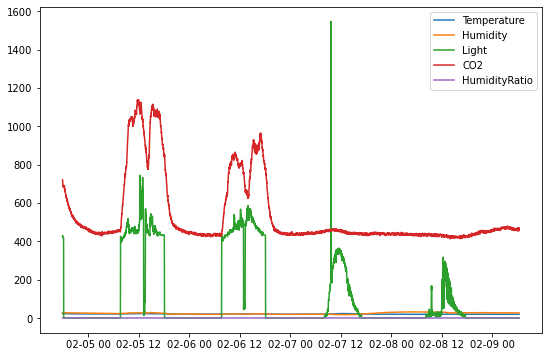

In [6]:
fig = plt.figure(figsize=(9,6))
plt.plot(X_train)
plt.legend(X_train.columns)

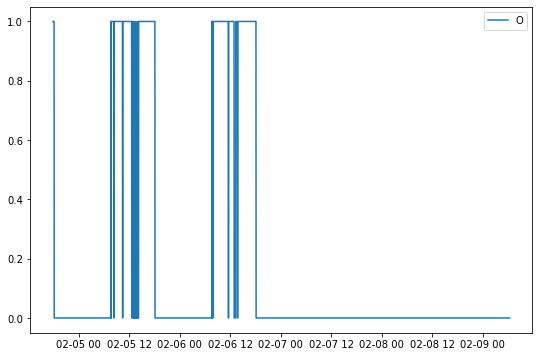

In [7]:
fig = plt.figure(figsize=(9,6))
plt.plot(y_train)
plt.legend(y_train.name)